In [4]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

from config.path import get_training_data_path

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

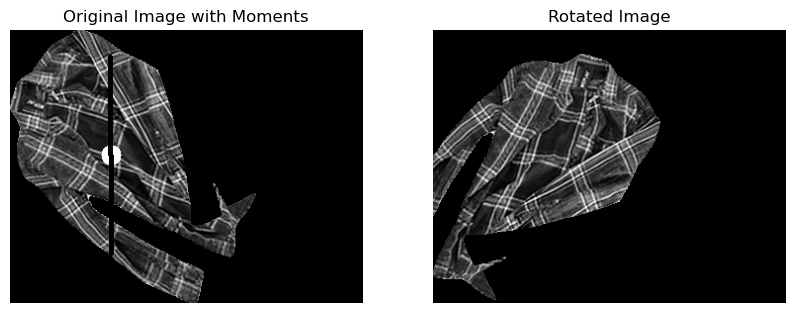

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rotate_using_symmetry_and_plot_with_moments(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Threshold image to create a binary image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # Calculate moments of binary image
    moments = cv2.moments(binary_image)
    if moments['mu02'] != 0:
        # Calculate the centroid of the binary image
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        
        # Calculate the angle of the axis of least inertia
        mu11 = moments['mu11'] / moments['mu02']
        angle_rad = 0.5 * np.arctan2(2 * mu11, moments['mu20'] - moments['mu02'])
        angle_deg = np.degrees(angle_rad)
        
        # Calculate line points for visualization based on the centroid and angle
        length = 100  # Length of the line for both directions from the center
        line_x1 = int(cx - length * np.cos(angle_rad))
        line_y1 = int(cy - length * np.sin(angle_rad))
        line_x2 = int(cx + length * np.cos(angle_rad))
        line_y2 = int(cy + length * np.sin(angle_rad))

        # Rotate image
        height, width = image.shape
        matrix = cv2.getRotationMatrix2D((cx, cy), -angle_deg, 1)
        rotated_image = cv2.warpAffine(image, matrix, (width, height))

        # Draw the centroid and the axis line on the original image
        cv2.circle(image, (cx, cy), 10, (255, 0, 0), -1)  # Red circle at centroid
        cv2.line(image, (line_x1, line_y1), (line_x2, line_y2), (0, 255, 0), 3)  # Green line for axis
    else:
        rotated_image = image  # Return original if no orientation can be calculated

    # Plot the original and rotated images using matplotlib
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image with Moments')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(rotated_image, cmap='gray')
    plt.title('Rotated Image')
    plt.axis('off')
    
    plt.show()


#file_name = 'tshirt_0070.jpg'
file_name = 'tshirt_0073.jpg'

img_path = get_training_data_path(file_name)

rotate_using_symmetry_and_plot_with_moments(img_path)

